In [94]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline


In [95]:
df = pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<Axes: xlabel='Survived'>

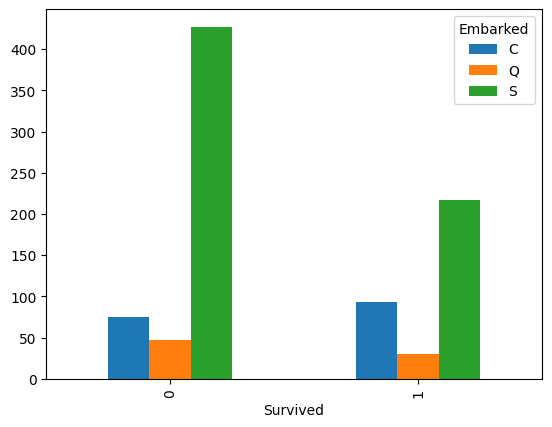

In [96]:
pd.crosstab(df.Survived,df.Embarked).plot(kind='bar')

In [97]:
target = df['Survived']



In [98]:
inputs = df.drop(['PassengerId','Survived','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns')
inputs.head()

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


In [99]:
from sklearn.preprocessing import LabelEncoder
le_Pclass=LabelEncoder()
le_Sex=LabelEncoder()
le_Age=LabelEncoder()
le_Fare=LabelEncoder()


In [100]:
inputs['Pclass_n'] = le_Pclass.fit_transform(inputs['Pclass'])
inputs['Sex_n'] = le_Sex.fit_transform(inputs['Sex'])
inputs['Age_n'] = le_Age.fit_transform(inputs['Age'])
inputs['Fare_n'] = le_Fare.fit_transform(inputs['Fare'])


In [101]:
inputs_n= inputs.drop(['Pclass','Sex','Age','Fare'], axis='columns')

In [102]:
inputs_n

,Pclass_n,Sex_n,Age_n,Fare_n
0,2,1,28,18
1,0,0,51,207
2,2,0,34,41
3,0,0,47,189
4,2,1,47,43
...,...,...,...,...
886,1,1,35,85
887,0,0,24,153
888,2,0,88,131
889,0,1,34,153


In [103]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs_n,target,train_size=0.3)


In [111]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [112]:
model.score(X_test,y_test)

0.7644230769230769